In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(filepath_or_buffer="snli_1.0_train.txt", delimiter='\t')

In [3]:
df

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,3416050480.jpg#4,3416050480.jpg#4r1n,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",3416050480.jpg#4,3416050480.jpg#4r1c,contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",3416050480.jpg#4,3416050480.jpg#4r1e,entailment,NaN,NaN,NaN,NaN
3,neutral,( Children ( ( ( smiling and ) waving ) ( at c...,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...,Children smiling and waving at camera,They are smiling at their parents,2267923837.jpg#2,2267923837.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
4,entailment,( Children ( ( ( smiling and ) waving ) ( at c...,( There ( ( are children ) present ) ),(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...,Children smiling and waving at camera,There are children present,2267923837.jpg#2,2267923837.jpg#2r1e,entailment,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550147,contradiction,( ( ( ( Four dirty ) and ) ( barefooted childr...,( ( four kids ) ( ( won awards ) ( ( ( for ` )...,(ROOT (NP (NP (CD Four) (NNS dirty)) (CC and) ...,(ROOT (S (NP (CD four) (NNS kids)) (VP (VBD wo...,Four dirty and barefooted children.,four kids won awards for 'cleanest feet',2267923837.jpg#3,2267923837.jpg#3r1c,contradiction,NaN,NaN,NaN,NaN
550148,neutral,( ( ( ( Four dirty ) and ) ( barefooted childr...,( ( ( ( ( ( four ( homeless children ) ) ( had...,(ROOT (NP (NP (CD Four) (NNS dirty)) (CC and) ...,(ROOT (S (S (NP (CD four) (JJ homeless) (NNS c...,Four dirty and barefooted children.,"four homeless children had their shoes stolen,...",2267923837.jpg#3,2267923837.jpg#3r1n,neutral,NaN,NaN,NaN,NaN
550149,neutral,( ( A man ) ( ( is ( surfing ( in ( ( a bodysu...,( ( ( A man ) ( in ( a bodysuit ) ) ) ( ( is (...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,(ROOT (S (NP (NP (DT A) (NN man)) (PP (IN in) ...,A man is surfing in a bodysuit in beautiful bl...,A man in a bodysuit is competing in a surfing ...,7979219683.jpg#2,7979219683.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
550150,contradiction,( ( A man ) ( ( is ( surfing ( in ( ( a bodysu...,( ( ( A man ) ( in ( a ( business suit ) ) ) )...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,(ROOT (S (NP (NP (DT A) (NN man)) (PP (IN in) ...,A man is surfing in a bodysuit in beautiful bl...,A man in a business suit is heading to a board...,7979219683.jpg#2,7979219683.jpg#2r1c,contradiction,NaN,NaN,NaN,NaN


In [4]:
df = df[['sentence1', 'sentence2', 'label1']]

In [5]:
# row of the dataset, want to split up the
df['concat'] = df['sentence1'] + " " + df['sentence2']

/tmp/ipykernel_28648/4264903914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['concat'] = df['sentence1'] + " " + df['sentence2']


In [6]:
df = df[['concat', 'label1']]

In [7]:
df

,concat,label1
0,A person on a horse jumps over a broken down a...,neutral
1,A person on a horse jumps over a broken down a...,contradiction
2,A person on a horse jumps over a broken down a...,entailment
3,Children smiling and waving at camera They are...,neutral
4,Children smiling and waving at camera There ar...,entailment
...,...,...
550147,Four dirty and barefooted children. four kids ...,contradiction
550148,Four dirty and barefooted children. four homel...,neutral
550149,A man is surfing in a bodysuit in beautiful bl...,neutral
550150,A man is surfing in a bodysuit in beautiful bl...,contradiction


In [8]:
import string
remove_punctuation = lambda s : str(s).lower().translate(str.maketrans('', '', string.punctuation))


In [9]:
remove_punctuation("yafqa. khan")

'yafqa khan'

In [10]:
df['concat'] = df['concat'].apply(remove_punctuation)

In [11]:
df['concat'].to_csv('sentences.txt')

In [12]:
df['concat'] = df['concat'].apply(remove_punctuation)

In [13]:
df

,concat,label1
0,a person on a horse jumps over a broken down a...,neutral
1,a person on a horse jumps over a broken down a...,contradiction
2,a person on a horse jumps over a broken down a...,entailment
3,children smiling and waving at camera they are...,neutral
4,children smiling and waving at camera there ar...,entailment
...,...,...
550147,four dirty and barefooted children four kids w...,contradiction
550148,four dirty and barefooted children four homele...,neutral
550149,a man is surfing in a bodysuit in beautiful bl...,neutral
550150,a man is surfing in a bodysuit in beautiful bl...,contradiction


In [14]:
word_to_labels = {}
legend = {'entailment': 0, 'contradiction': 1, 'neutral': 2}

for idx, row in df.iterrows():
    if row['label1'] not in legend:
        continue

    for word in row['concat'].split():
        if word not in word_to_labels:
            word_to_labels[word] = [0] * 3
        word_to_labels[word][legend[row['label1']]] += 1

In [15]:
word_to_labels['amazing']

[34, 28, 47]

In [16]:
word_freq_df = pd.DataFrame.from_dict(word_to_labels, orient='index').rename(columns={0: 'entailment', 1: "contradiction", 2: "neutral"})

In [17]:
# need to compute p_hat for each word:
# take the maximum over the sum for each column
word_freq_df['max'], word_freq_df['n'] = [word_freq_df.max(axis=1), word_freq_df.sum(axis=1)]

In [18]:
word_freq_df['p_hat'] = word_freq_df['max'] / word_freq_df['n']

In [19]:
word_freq_df.sort_values(by=['n'])

,entailment,contradiction,neutral,max,n,p_hat
cleanest,0,1,0,1,1,1.000000
h2o,1,0,0,1,1,1.000000
macro,0,1,0,1,1,1.000000
wtc,0,1,0,1,1,1.000000
readheaded,0,1,0,1,1,1.000000
...,...,...,...,...,...,...
man,87600,89252,88047,89252,264899,0.336928
is,122243,126184,125449,126184,373876,0.337502
in,131868,141686,134103,141686,407657,0.347562
the,148945,192320,194215,194215,535480,0.362693


In [20]:
word_freq_df['p_contradiction'], word_freq_df['p_entailment'], word_freq_df['p_neutral'] = [word_freq_df['contradiction'] / word_freq_df['n'], 
                                                                                            word_freq_df['entailment'] / word_freq_df['n'],
                                                                                            word_freq_df['neutral'] / word_freq_df['n']]

In [21]:
word_freq_df

,entailment,contradiction,neutral,max,n,p_hat,p_contradiction,p_entailment,p_neutral
a,482723,474853,483457,483457,1441033,0.335493,0.329523,0.334984,0.335493
person,15494,10093,10246,15494,35833,0.432395,0.281668,0.432395,0.285938
on,77066,80965,78169,80965,236200,0.342782,0.342782,0.326274,0.330944
horse,2340,2517,2298,2517,7155,0.351782,0.351782,0.327044,0.321174
jumps,2357,2100,2185,2357,6642,0.354863,0.316170,0.354863,0.328967
...,...,...,...,...,...,...,...,...,...
nailgloss,1,1,1,1,3,0.333333,0.333333,0.333333,0.333333
hospice,0,0,1,1,1,1.000000,0.000000,0.000000,1.000000
prformance,0,0,1,1,1,1.000000,0.000000,0.000000,1.000000
chilldren,1,0,0,1,1,1.000000,0.000000,1.000000,0.000000


In [69]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

alpha = 1 - 0.01 / 11149340
z_star = norm.ppf(alpha)

In [70]:
boundary = lambda n : np.sqrt(2) * z_star / (3 * np.sqrt(n)) + 1/3

In [24]:
x_vals = np.linspace(0, 1e6, 10 ** 7)
y_vals = boundary(x_vals)

/tmp/ipykernel_28648/2532280857.py:1: RuntimeWarning: divide by zero encountered in divide
  boundary = lambda n : np.sqrt(2) * z_star / (3 * np.sqrt(n)) + 1/3


In [71]:
boundary(1441033)

0.3356955798501552

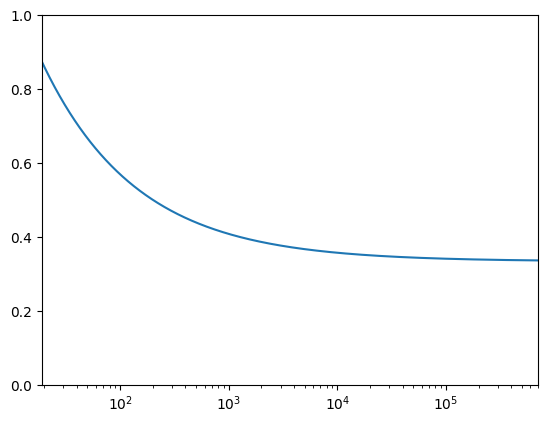

In [25]:
ax = plt.gca()
ax.set_xlim([1.9e1, 7e5])
ax.set_ylim([0, 1])
plt.xscale("log")
plt.plot(x_vals, y_vals)

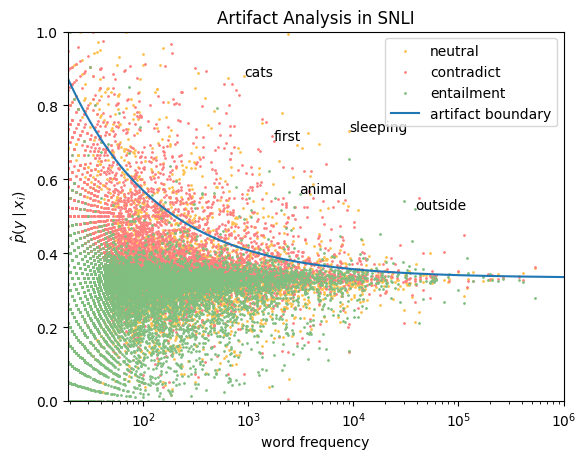

In [54]:
from matplotlib import pyplot as plt

plt.xscale("log")
ax = plt.gca()
ax.set_xlim([1.9e1, 1e6])
ax.set_ylim([0, 1])
plt.title("Artifact Analysis in SNLI")
plt.ylabel("$\hat{p}(y \mid x_i)$")
plt.xlabel("word frequency")
plt.scatter(x=word_freq_df['n'], y=word_freq_df['p_contradiction'], s=1, label='neutral', color='#FFC04D')
plt.scatter(x=word_freq_df['n'], y=word_freq_df['p_neutral'], s=1, label='contradict', color='#FF8080')
plt.scatter(x=word_freq_df['n'], y=word_freq_df['p_entailment'], s=1, label='entailment', color='#80BF80')
plt.plot(x_vals, y_vals, label='artifact boundary')
words = ['cats', 'first', 'animal', 'outside', 'sleeping']
for word in words:
    ax.annotate(word, (word_freq_df.loc[word]['n'], max(word_freq_df.loc[word]['p_entailment'], 
                                                        word_freq_df.loc[word]['p_contradiction'],
                                                        word_freq_df.loc[word]['p_neutral'])))
plt.legend()

In [27]:
word_freq_df[['n', 'p_contradiction', 'p_entailment', 'p_neutral']]

,n,p_contradiction,p_entailment,p_neutral
a,1441033,0.329523,0.334984,0.335493
person,35833,0.281668,0.432395,0.285938
on,236200,0.342782,0.326274,0.330944
horse,7155,0.351782,0.327044,0.321174
jumps,6642,0.316170,0.354863,0.328967
...,...,...,...,...
nailgloss,3,0.333333,0.333333,0.333333
hospice,1,0.000000,0.000000,1.000000
prformance,1,0.000000,0.000000,1.000000
chilldren,1,0.000000,1.000000,0.000000


In [76]:
max_p = word_freq_df[['p_contradiction', 'p_entailment', 'p_neutral']].max(axis=1)
word_freq_df['boundary'] = boundary(word_freq_df['n'])
word_freq_df['isArtifact'] = max_p > word_freq_df['boundary']
word_freq_df[['n', 'p_contradiction', 'p_entailment', 'p_neutral', 'boundary', 'isArtifact']]\
                                                 .sort_values(by=['isArtifact', 'n'], ascending=False)\
                                                 .to_csv("snli_artifacts.csv")
word_freq_df['diff'] = abs(word_freq_df['boundary'] - word_freq_df['p_hat'])

word_freq_df[['n', 'p_contradiction', 'p_entailment', 'p_neutral', 'boundary', 'isArtifact', 'diff']].sort_values(by=['isArtifact', 'diff'], ascending=False)\
                                                                                                     .to_csv("snli_artifacts.csv")

In [1]:
import pandas as pd

yafqa = pd.read_csv("snli_artifacts.csv")

In [3]:
len(yafqa[yafqa["isArtifact"]]) / len(yafqa)

0.022521896288057834

In [4]:
sst2_artifacts = pd.read_csv("../sst2_artifacts.csv")

In [5]:
len(sst2_artifacts[sst2_artifacts["isArtifact"]]) / len(sst2_artifacts)

0.06494831338411317